# Determining The Best City to Live In as a Post-Grad

Cece Haase and Gabby Reese

[Link to our GitHub website](https://github.com/gabbyreese/gabbyreese.github.io/)

# Project Goals
The goal of this project is to investigate and determine the best city to live in as a post-grad in terms of walkability, diversity, population average age, average income, and weather. We will be investigating 10 popular cities.
# Project Dataset
One of the datasets we are considering working with is [The Walkability Index](https://catalog.data.gov/dataset/walkability-index1). This data is provided by the U.S. Environmental Protection Agency. The Walkability Index dataset characterizes every Census 2019 block group in the U.S. based on its relative walkability. Walkability depends upon characteristics of the built environment that influence the likelihood of walking being used as a mode of travel.

Within our project we will likely use two to three datasets. We have determined that the factors we will focus on when analysing the livability of a city is its walkability, diversity, population average age, average income, and weather. For each factor, we will take the average index of each city and compile these factors together in a data table. By examining these factors, we hope to create a resource for post graduates looking to make an informed decision on where they should move to. Our data table and graphs using this data we have collected will help display what each of these cities have to offer. We will be assessing Atlanta, Austin, Boston, Chicago, Denver, Los Angeles, Miami, New York City, Philadelphia, and Washington DC.

# Collaboration Plan
Our collaboration plan is to meet on zoom once a week to work on the final project. We have set up a google colab to work on our code together and make any updates. From now to April 12, we plan on finalizing the datasets we are using, cleaning and tidying up our data and creating necessary graphs for Milestone 2. From April 12 to May 3, we plan on developing our insights, visualizations, and presentation for the final project and presentation.

# ETL (Extraction, Transform, and Load)
We loaded one of our dataset .xlsx files from The Walkability Index. The original data columns listed many unnecessary indexes we do not need for our data collection. We tidied the data by melting the dataframe to only show the ID, National Walking Index, City Name, and Rank. Within this dataset, each city has numerous entries as the data comes from every Census block group. Our next steps are to filter the data to only show the ten cities we are interested in. Then, we can take the average Walkability Index for each city.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [ ]:
df_walk = pd.read_csv('/content/sample_data/EPA_SmartLocationDatabase_V3_Jan_2021_Final.csv')


FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/EPA_SmartLocationDatabase_V3_Jan_2021_Final.csv'

In [ ]:
df_walk.sort_values(by=["D2A_Ranked"])


NameError: name 'df_walk' is not defined

We tidied the data by melting the dataframe to only show the ID, National Walking Index, City Name, and Rank.

In [ ]:
df_walk.rename(columns={"D2A_Ranked": "RankingW"}, inplace=True)
f_df = pd.melt(df_walk,
               id_vars=["GEOID10", "NatWalkInd"],
               var_name="CSA_Name",
               value_name="RankingW")


f_df.head()

NameError: name 'df_walk' is not defined

<Axes: ylabel='Frequency'>

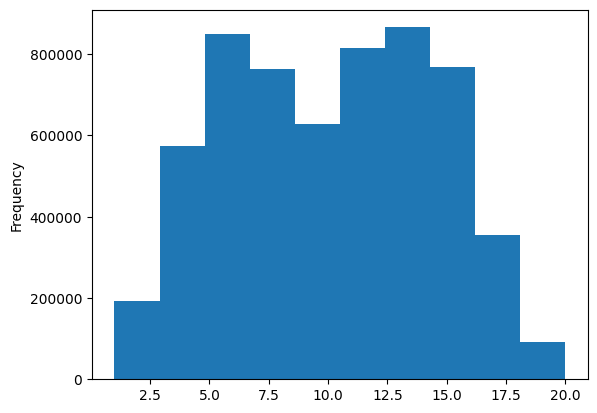

In [ ]:

f_df.NatWalkInd.plot.hist() #shows frequency of national walking index scores, helpful use for comparrison across cities

**MILESTONE TWO**

For this section we will start sorting data pertaining to popular cities to anazlyze which are best postgrad. We will focus on the crime rate, cost of living, and demographics of our focused cities.

In [ ]:
df_crime=pd.read_csv('/content/sample_data/crime_250_plus.csv')
df_crime.set_index('cities', inplace=True)
crimeLA= df_crime.loc["Huntington Beach"]
crimeAtlanta =df_crime.loc["Athens-Clarke Country"]
crimeAustin=df_crime.loc["Round Rock"]
crimeBoston=df_crime.loc["Cambridge"]
crimeChicago=df_crime.loc["Joliet"]
crimeDenver=df_crime.loc["Westminster"]
crimeMiami=df_crime.loc["Miami Gardens"]
crimeNYC=df_crime.loc["Rochester"]
crimePhiladelphia=df_crime.loc["Allentown"]
crimeDC=df_crime.loc["Bellevue"]

df_crimecomb=pd.concat([crimeLA, crimeAtlanta, crimeAustin, crimeBoston, crimeChicago, crimeDenver, crimeMiami, crimeNYC, crimePhiladelphia, crimeDC], axis=1)

df_crimecomb

KeyError: 'Huntington Beach'

In [ ]:
df_costliving = pd.read_csv('/content/sample_data/Cost_of_living_Missouri_Economic_Research_and_Information_Center.csv')
df_costliving.set_index('State', inplace=True)
costLA=df_costliving.loc["CA"]
costAtlanta =df_costliving.loc["GA"]
costAustin=df_costliving.loc["TX"]
costBoston=df_costliving.loc["MA"]
costChicago=df_costliving.loc["IL"]
costDenver=df_costliving.loc["CO"]
costMiami=df_costliving.loc["FL"]
costNYC=df_costliving.loc["NY"]
costPhiladelphia=df_costliving.loc["PA"]
costDC=df_costliving.loc["DC"]

df_costcomb=pd.concat([costLA, costAtlanta, costAustin, costBoston, costChicago, costDenver, costMiami, costNYC, costPhiladelphia, costDC], axis=1)

df_costcomb


,CA,GA,TX,MA,IL,CO,FL,NY,PA,DC
Rank,49.0,12.0,17.0,50.0,11.0,35.0,31.0,48.0,28.0,51.0
Conversion,134.5,91.0,93.0,148.4,90.8,105.5,102.3,125.1,99.0,148.7
Grocery,112.3,98.9,94.8,105.0,97.5,100.6,100.1,103.0,100.9,106.9
Housing,186.5,78.5,84.2,219.5,78.3,116.1,110.5,173.3,89.9,241.8
Utilities,124.8,84.4,105.7,126.1,90.9,90.9,96.7,102.5,105.9,110.2
Transportation,124.1,94.5,92.6,127.5,102.4,107.4,99.8,106.7,108.2,107.9
Health,106.4,101.4,94.1,112.6,95.4,102.0,96.3,104.5,96.7,104.7
Misc.,110.9,97.2,95.9,125.8,94.3,103.0,99.4,109.0,102.0,117.7


In [ ]:
df_costcomb=df_costcomb.transpose()

In [ ]:
# prompt: Using dataframe df_costcomb: total the spending for each state
#df_costcomb.transpose()

df_costcomb['Total'] = df_costcomb.sum(axis=1)
df_costcomb


,Rank,Conversion,Grocery,Housing,Utilities,Transportation,Health,Misc.,Total
CA,49.0,134.5,112.3,186.5,124.8,124.1,106.4,110.9,948.5
GA,12.0,91.0,98.9,78.5,84.4,94.5,101.4,97.2,657.9
TX,17.0,93.0,94.8,84.2,105.7,92.6,94.1,95.9,677.3
MA,50.0,148.4,105.0,219.5,126.1,127.5,112.6,125.8,1014.9
IL,11.0,90.8,97.5,78.3,90.9,102.4,95.4,94.3,660.6
CO,35.0,105.5,100.6,116.1,90.9,107.4,102.0,103.0,760.5
FL,31.0,102.3,100.1,110.5,96.7,99.8,96.3,99.4,736.1
NY,48.0,125.1,103.0,173.3,102.5,106.7,104.5,109.0,872.1
PA,28.0,99.0,100.9,89.9,105.9,108.2,96.7,102.0,730.6
DC,51.0,148.7,106.9,241.8,110.2,107.9,104.7,117.7,988.9


<Axes: title={'center': 'Total Cost by Rank'}, xlabel='Rank'>

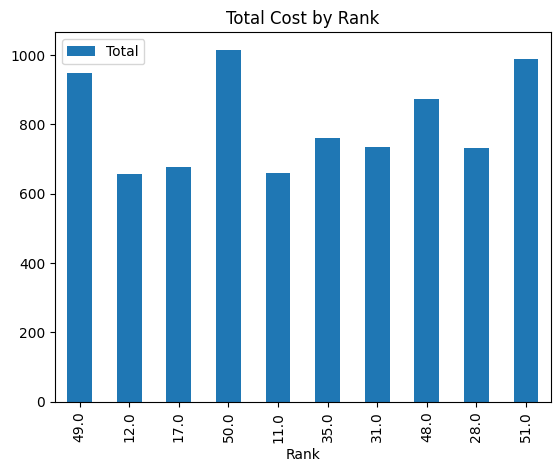

In [ ]:
# prompt: Using dataframe df_costcomb: plot the total for each row

df_costcomb[:-1].plot(kind='bar', x='Rank', y='Total', title='Total Cost by Rank')


With this data set, we will analyze the total cost of living for each of our particular cities. This is a useful data set to have because determing whether a city is affordable or not is an important part of selecting a city to live in. This graph analyzes these cities by their total cost.

In [ ]:
df_costcomb=df_costcomb.transpose()

,CA,GA,TX,MA,IL,CO,FL,NY,PA,DC,Total
Rank,49.0,12.0,17.0,50.0,11.0,35.0,31.0,48.0,28.0,51.0,332.0
Conversion,134.5,91.0,93.0,148.4,90.8,105.5,102.3,125.1,99.0,148.7,1138.3
Grocery,112.3,98.9,94.8,105.0,97.5,100.6,100.1,103.0,100.9,106.9,1020.0
Housing,186.5,78.5,84.2,219.5,78.3,116.1,110.5,173.3,89.9,241.8,1378.6
Utilities,124.8,84.4,105.7,126.1,90.9,90.9,96.7,102.5,105.9,110.2,1038.1
Transportation,124.1,94.5,92.6,127.5,102.4,107.4,99.8,106.7,108.2,107.9,1071.1
Health,106.4,101.4,94.1,112.6,95.4,102.0,96.3,104.5,96.7,104.7,1014.1
Misc.,110.9,97.2,95.9,125.8,94.3,103.0,99.4,109.0,102.0,117.7,1055.2
Total,948.5,657.9,677.3,1014.9,660.6,760.5,736.1,872.1,730.6,988.9,8047.4


<BarContainer object of 9 artists>

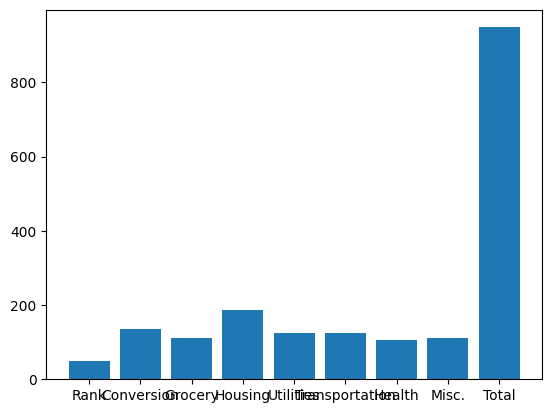

In [ ]:
plt.bar(df_costcomb.index, df_costcomb['CA'])

<Axes: >

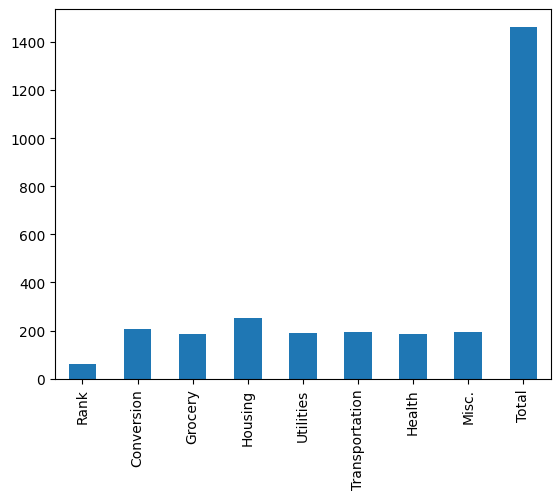

In [ ]:
# prompt: Using dataframe df_costcomb: make a bar plot of the mean of each column
df_costcomb=df_costcomb.transpose()
df_costcomb.mean(axis=0).plot(kind='bar')


In [ ]:
# prompt: Using dataframe df_costcomb: tidy

tidycost = df_costcomb.melt(id_vars='index', var_name='state', value_name='cost')


In [ ]:
df_demographics=pd.read_csv('/content/sample_data/us-cities-demographics.csv', sep=";")
df_demographics.set_index('City', inplace=True)
demoLA=df_demographics.loc["East Los Angeles"]
demoAtlanta=df_demographics.loc["Atlanta"]
demoAustin=df_demographics.loc["Cedar Park"]
demoBoston=df_demographics.loc["Cambridge"]
demoChicago=df_demographics.loc["Chicago"]
demoDenver=df_demographics.loc["Denver"]
demoMiami=df_demographics.loc["Miami"]
demoNYC = df_demographics.loc["Yonkers"]
demoPhiladelphia=df_demographics.loc["Wilmington"]
demoDC=df_demographics.loc["Washington"]
df_demographicscomb=pd.concat([demoLA, demoAtlanta, demoAustin, demoBoston, demoChicago, demoDenver, demoMiami, demoNYC, demoPhiladelphia, demoDC])
demographics = pd.concat([df_demographics.iloc[[0, 5, 10, 15, 20, 25, 30, 35, 40, 50]]], ignore_index=True)
print(demographics)
demographics_tidy = demographics.melt(id_vars=["State"])
demographics_tidy
#demographics_tidy.rename(columns={"variable": "Demographic Feature", "value": "Value"}, inplace=True)





          State  Median Age  Male Population  Female Population  \
0    New Jersey        34.6         138040.0           143873.0   
1       Arizona        36.9         234998.0           236835.0   
2    Washington        37.7         100914.0           107036.0   
3    California        39.7          53817.0            52757.0   
4      Colorado        29.0          56342.0            51000.0   
5     Wisconsin        30.7         122596.0           126360.0   
6       Florida        45.1          38166.0            42841.0   
7      Missouri        26.8          56544.0            62554.0   
8  South Dakota        39.5          36122.0            37446.0   
9      New York        31.4         100135.0           109673.0   

   Total Population  Number of Veterans  Foreign-born  Average Household Size  \
0            281913              5829.0       86253.0                    2.73   
1            471833             31808.0       57492.0                    2.68   
2            207950

,State,variable,value
0,New Jersey,Median Age,34.6
1,Arizona,Median Age,36.9
2,Washington,Median Age,37.7
3,California,Median Age,39.7
4,Colorado,Median Age,29.0
...,...,...,...
95,Wisconsin,Count,2296
96,Florida,Count,3249
97,Missouri,Count,8673
98,South Dakota,Count,9159


In [ ]:
chart = alt.Chart(demographics_tidy).mark_bar().encode(
    x='State',
    y='value',
    color='variable:N',
).transform_calculate(
    "Female Population Percentage", "datum.value / 100"
).transform_filter(
    "datum.variable == 'Female Population' || datum.variable == 'Male Population'"
)
chart

alt.Chart(...)

This data set shows the population of female to male citizens in a city. This demonstrates the demographic overview of a city by gender and is a useful data set to have when determining our research question. Typically, postgrads prefer a city with an equal male to female ratio.

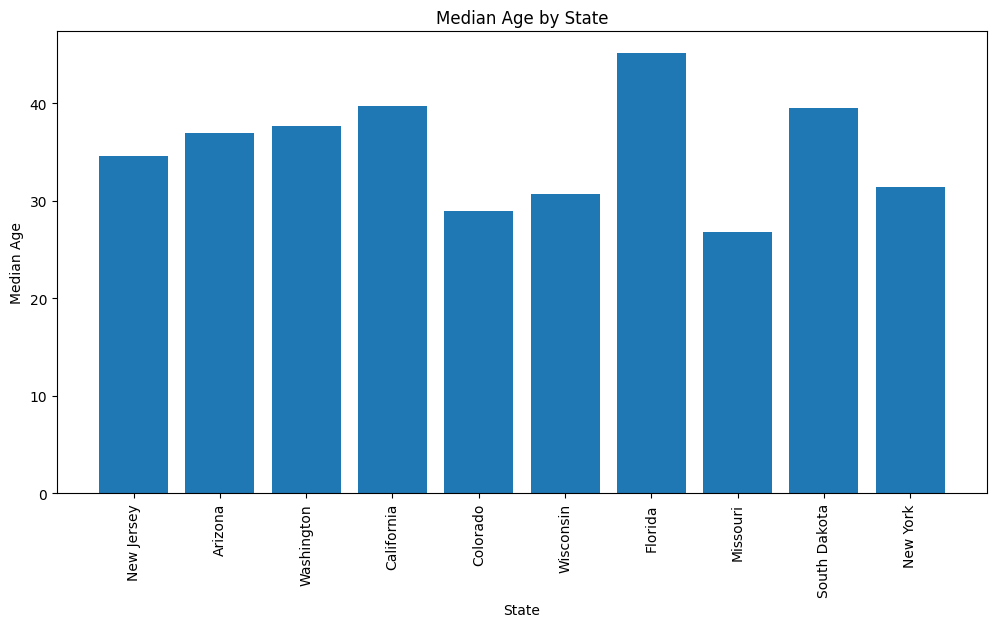

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
x_ticks = range(len(demographics['State']))

plt.bar(demographics['State'], demographics['Median Age'])
plt.xticks(x_ticks, demographics['State'], rotation=90)

plt.title('Median Age by State')
plt.xlabel('State')
plt.ylabel('Median Age')

plt.show()

This dataset shows the median age per city we have selected. Most postgrads may prefer a city with a well established social scene with people their age. This is an important factor when determining a city to move to after college. We have found that the state of Florida has the highest age group demographic and Missouri has the youngest age group, with Colorado following close behind.

Next, we plan to take the data we have and cross reference with each other to give each city a score based on the variables we have provided. Doing this, we will evalaute the best city to live in post-grad.

In [ ]:

#jupyter nbconvert --to html '/content/drive/MyDrive/Other/Data Science Final Project'
!jupyter nbconvert mynotebook.ipynb --stdout

[NbConvertApp] WARNING | pattern 'mynotebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    